In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dataset

1. Since data is in form of excel file we have to use pandas read_csv to load the data
2. After loading  it is important to check null values in a column or a row
3. if it is present then following can be done,
  a. Filling NaN values with mean or median or mode using fillna() method
  b. Imputing data using Imputation method in sklearn
  c. If there are less NaN values then we can drop those indexes as well.
4. Describe data --> which can give statistical analysis

In [2]:
#importing data

df  = pd.read_excel(r"C:\Users\Imran\Documents\DATA SCIENCE\Python Basics\imran\End to End Project\Flight-Price-Prediction\Data_Train.xlsx",sheet_name='Sheet1')

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [5]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
df.info()    #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Cleaning

In [8]:
#finding the null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# We observe 2 missing values,so we can directly drop these as these are very less

df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# The data type of Date_of_journey,Arrival_Time and Dep_Time is object so we convert it into date and time for proper prediction.

In [13]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [16]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-19 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-19 05:50:00,2022-08-19 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-19 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-08-19 18:05:00,2022-08-19 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-08-19 16:50:00,2022-08-19 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-08-19 19:55:00,2022-08-19 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-08-19 20:45:00,2022-08-19 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-08-19 08:20:00,2022-08-19 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-08-19 11:30:00,2022-08-19 14:10:00,2h 40m,non-stop,No info,12648


In [17]:
df['journey_day']=df['Date_of_Journey'].dt.day

In [18]:
df['journey_month']=df['Date_of_Journey'].dt.month

In [19]:
df['journey_week']=df['Date_of_Journey'].dt.isocalendar().week

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-19 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,12
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-19 05:50:00,2022-08-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-19 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,36
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-08-19 18:05:00,2022-08-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,49
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-08-19 16:50:00,2022-08-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,1


In [21]:
df.drop(columns='Date_of_Journey',inplace = True)

In [22]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-08-19 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,12
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-19 05:50:00,2022-08-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-19 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,36
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-08-19 18:05:00,2022-08-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,49
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-08-19 16:50:00,2022-08-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-08-19 19:55:00,2022-08-19 22:25:00,2h 30m,non-stop,No info,4107,4,9,36
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-08-19 20:45:00,2022-08-19 23:20:00,2h 35m,non-stop,No info,4145,27,4,17
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-08-19 08:20:00,2022-08-19 11:20:00,3h,non-stop,No info,7229,27,4,17
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-08-19 11:30:00,2022-08-19 14:10:00,2h 40m,non-stop,No info,12648,3,1,1


In [23]:
#Extracting hour and minutes from Dep_time and Arrival_time

In [24]:
df['Dep_Time_hour'] = df['Dep_Time'].dt.hour

In [25]:
df['Dep_Time_min'] = df['Dep_Time'].dt.minute

In [26]:
df['Arrival_Time_hour'] = df['Arrival_Time'].dt.hour

In [27]:
df['Arrival_Time_min'] = df['Arrival_Time'].dt.minute

In [28]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace = True)

In [29]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,12,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,36,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,49,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,1,16,50,21,35


In [30]:
 dur = list(df['Duration'])

In [31]:
for i in range(len(dur)):
    if len(dur[i].split(" "))==2:
        pass
    else:
        if 'h' in dur[i]:
            dur[i]=dur[i]+" 0m"
        else:
            dur[i] = "0h "+dur[i]

In [32]:
df['Duration']=dur

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,12,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,36,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,49,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,1,16,50,21,35


In [34]:
def hour(x):
    return x.split(" ")[0][0:-1]
def minutes(x):
    return x.split(" ")[1][0:-1]

In [35]:
df['dur_hour'] = df['Duration'].apply(hour)

In [36]:
df['dur_min'] = df['Duration'].apply(minutes)

In [37]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,36,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,49,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,1,16,50,21,35,4,45


In [38]:
df.drop(columns="Duration",inplace = True)

In [39]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,36,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,49,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,36,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,17,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,17,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,1,11,30,14,10,2,40


In [40]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
journey_week         UInt32
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [41]:
df['dur_hour'] = df['dur_hour'].astype(int)

In [42]:
df['dur_min'] = df['dur_min'].astype(int)

In [43]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
journey_week         UInt32
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

# handlind categorical data

In [44]:
# We are using two Encoding technique to convert Categorical Data into Some numeric format

#Nominal data-- Data that are not in any order --> one hot encoding
#ordinal data-- Data that are in order --> labelEncoder

In [45]:
cat_col = [i for i in df.columns if df[i].dtype == 'object']

In [46]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [47]:
cont_col = [i for i in df.columns if df[i].dtypes != object]

In [48]:
categorical = df[cat_col]

In [49]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [50]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [51]:
#Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

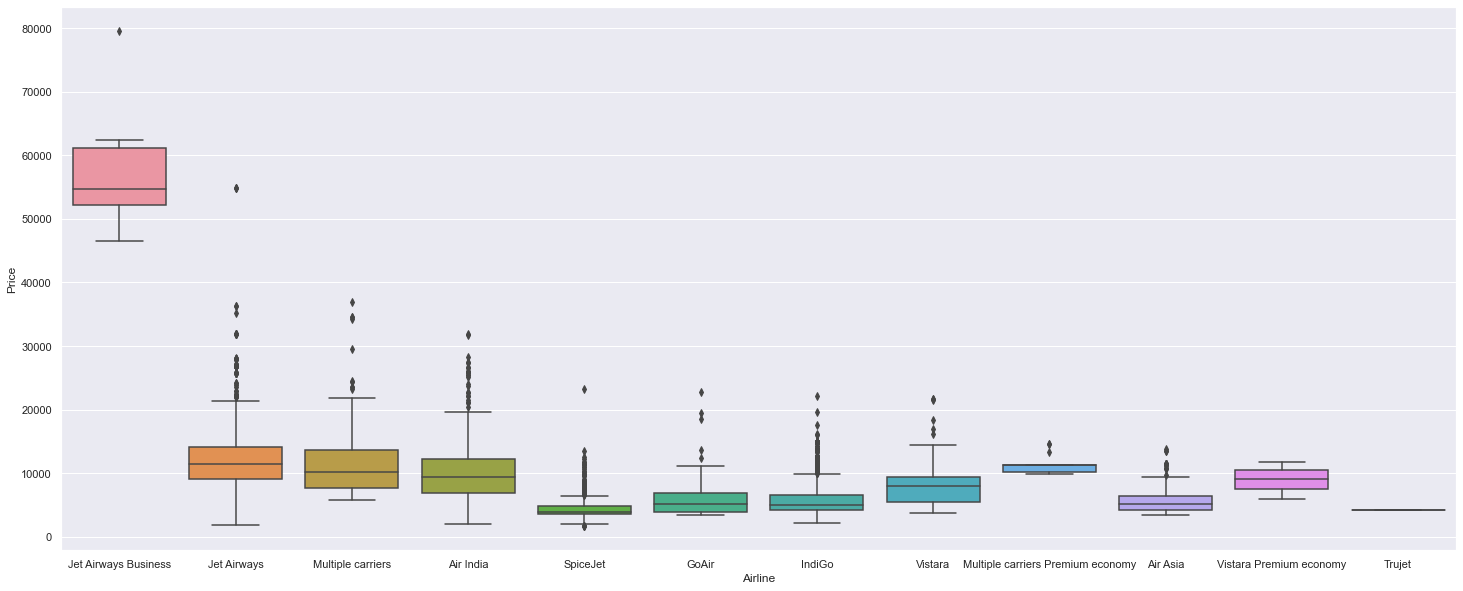

In [52]:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'Airline',y = 'Price' , data = df.sort_values('Price',ascending=False))

In [53]:
# perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

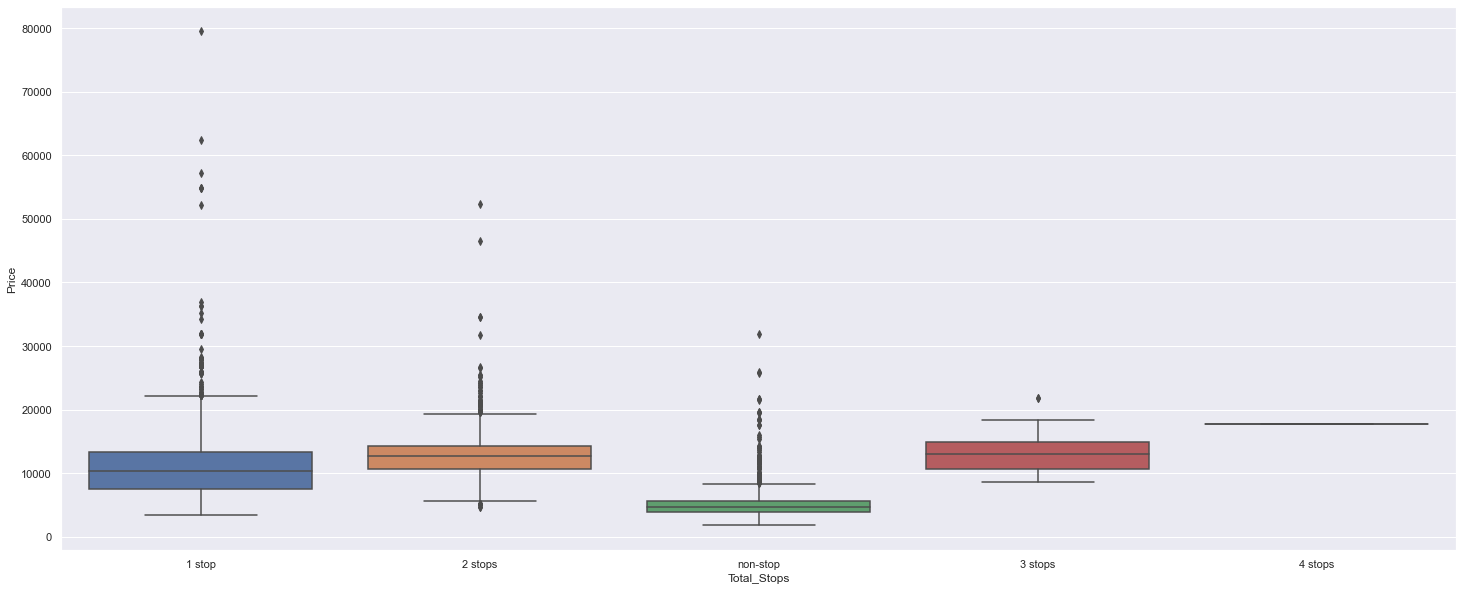

In [54]:
plt.figure(figsize = (25,10))
sns.boxplot(x = 'Total_Stops',y = 'Price',data = df.sort_values('Price',ascending=False))

In [55]:
# As Airline is nominal categorical data we will perform OneHotEncoding
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

In [56]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [57]:
 df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 2520x2160 with 0 Axes>

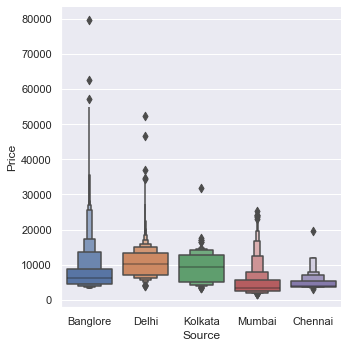

In [58]:
plt.figure(figsize = (35,30))
sns.catplot(x = 'Source',y = 'Price',data = df.sort_values('Price',ascending=False),kind = 'boxen')

In [59]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

In [60]:
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [61]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

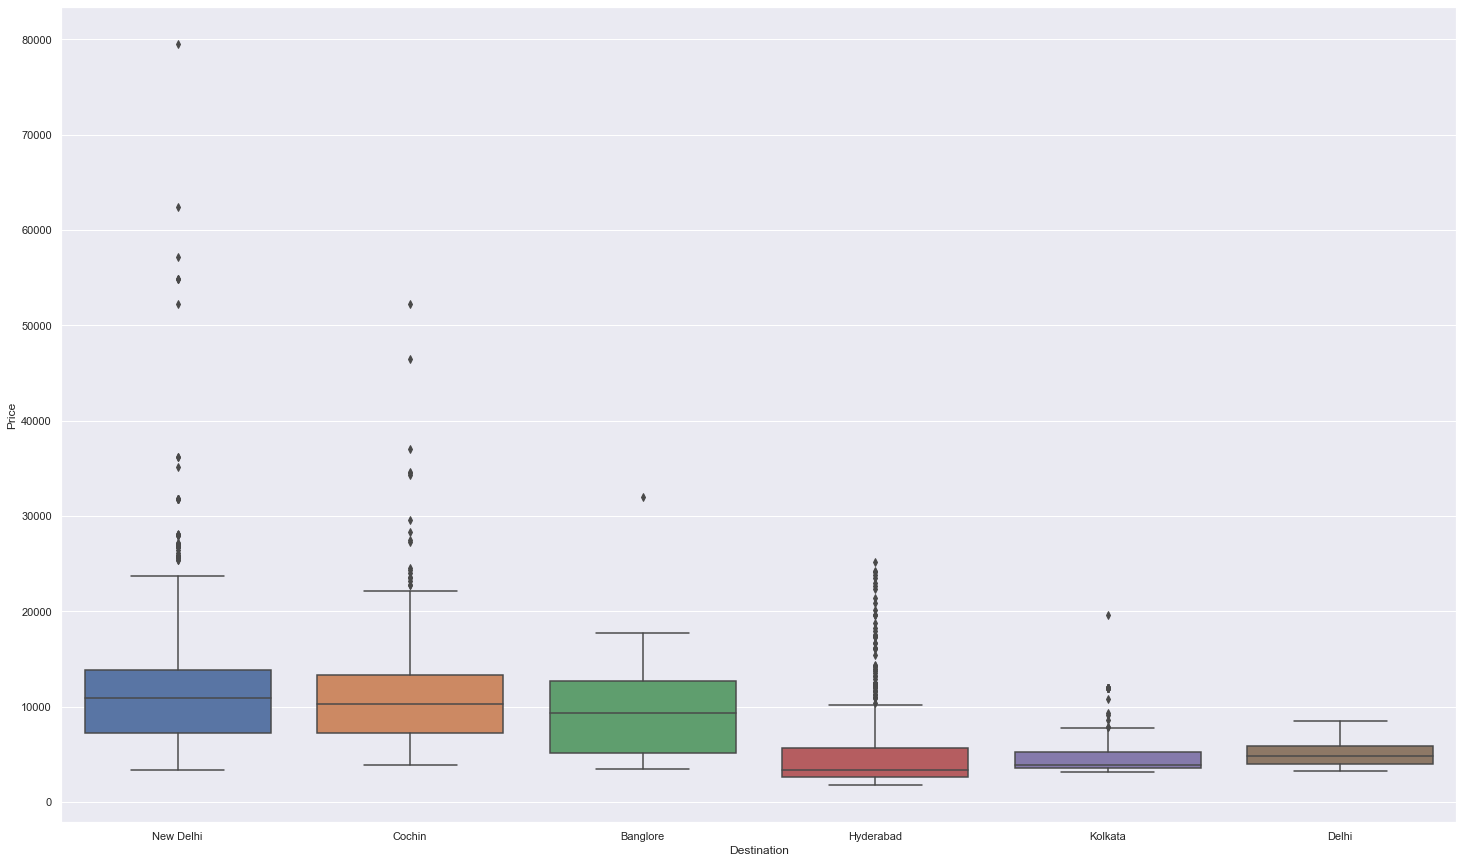

In [62]:
plt.figure(figsize = (25,15))
sns.boxplot(x = 'Destination',y = 'Price',data = df.sort_values('Price',ascending=False))

In [63]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

In [64]:
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [65]:
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [66]:
categorical['Route1']=categorical['Route'].str.split("→").str[0]
categorical['Route2']=categorical['Route'].str.split("→").str[1]
categorical['Route3']=categorical['Route'].str.split("→").str[2]
categorical['Route4']=categorical['Route'].str.split("→").str[3]
categorical['Route5']=categorical['Route'].str.split("→").str[4]

C:\Users\Imran\AppData\Local\Temp/ipykernel_19888/1171247494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split("→").str[0]
C:\Users\Imran\AppData\Local\Temp/ipykernel_19888/1171247494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split("→").str[1]
C:\Users\Imran\AppData\Local\Temp/ipykernel_19888/1171247494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [67]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [68]:
categorical.drop(columns='Route',inplace=True)

C:\Users\Imran\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [70]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace = True)

C:\Users\Imran\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [71]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [72]:
for i in categorical.columns:
    print('{} has total {} categoreies'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categoreies
Source has total 5 categoreies
Destination has total 6 categoreies
Total_Stops has total 5 categoreies
Additional_Info has total 10 categoreies
Route1 has total 5 categoreies
Route2 has total 45 categoreies
Route3 has total 30 categoreies
Route4 has total 14 categoreies
Route5 has total 6 categoreies


In [73]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None


In [74]:
# Applying label encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [75]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\Imran\AppData\Local\Temp/ipykernel_19888/1864785191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [76]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [77]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [78]:
dict = {'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\Imran\AppData\Local\Temp/ipykernel_19888/3914633815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [79]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,No info,0,13,29,13,5


In [80]:
categorical.drop(columns=['Airline','Source','Destination','Additional_Info'],inplace = True)

C:\Users\Imran\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
categorical

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5
...,...,...,...,...,...,...
10678,0,2,5,29,13,5
10679,0,2,5,29,13,5
10680,0,0,13,29,13,5
10681,0,0,13,29,13,5


In [82]:
dff = pd.concat([categorical,Airline,Source,Destination,df[cont_col]], axis=1)

In [83]:
dff

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,12,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,36,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,49,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,4107,4,9,36,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,...,4145,27,4,17,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,...,7229,27,4,17,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,...,12648,3,1,1,11,30,14,10,2,40


# Check for Outliers

In [84]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax = ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Imran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


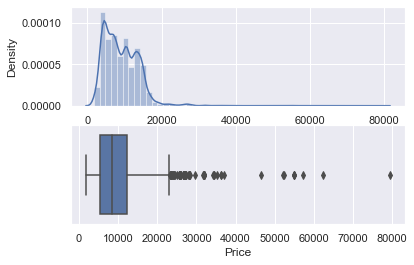

In [85]:
plot(dff,'Price')

In [86]:
dff['Price']=np.where(dff['Price']>=40000,dff['Price'].median(),dff['Price'])

C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Imran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


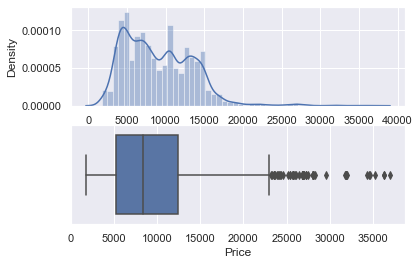

In [87]:
plot(dff,'Price')

In [88]:
#Seperate the Dataset in X and Y columns

In [89]:
X = dff.drop(columns='Price')

In [90]:
Y = dff['Price']

# Feature selection

In [91]:
# It is about finding the best feature and having good relation with independent variable issue of dimensionality reduction reduces.

In [92]:
# Finds correclation between Independent and dependent attributes

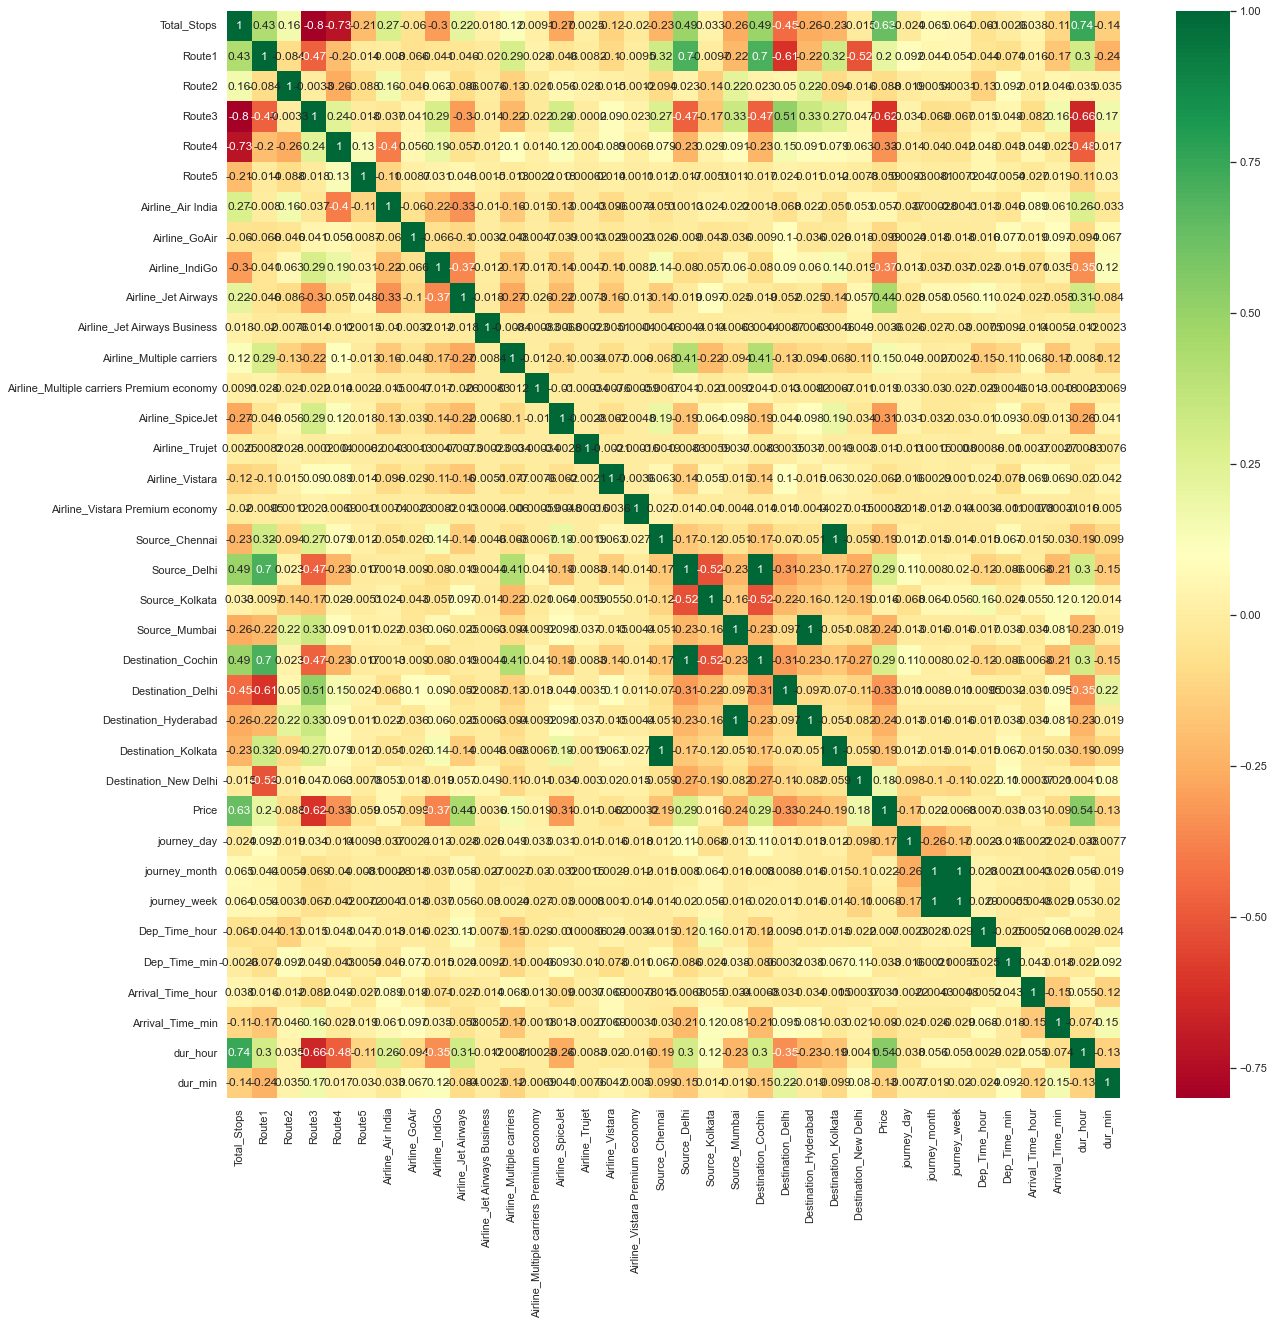

In [93]:
plt.figure(figsize = (20,20))
sns.heatmap(dff.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [94]:
# Important Feature using ExtraTreeRegression

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [95]:
selection.feature_importances_

array([1.72120936e-01, 9.18985460e-03, 2.33806061e-02, 2.05497652e-01,
       1.84531225e-02, 4.34102125e-04, 8.86544595e-03, 1.25448083e-03,
       1.38067918e-02, 1.03482324e-01, 3.53302671e-04, 2.78146766e-02,
       1.11218627e-03, 2.28446019e-03, 8.76038426e-05, 5.83526168e-03,
       1.49901017e-04, 5.27033059e-04, 2.19109336e-03, 3.03333559e-03,
       3.60283315e-03, 1.99556995e-03, 1.06402985e-03, 4.30496963e-03,
       3.08852904e-04, 1.57474256e-02, 1.08821648e-01, 4.82753565e-02,
       5.12194701e-02, 1.95634811e-02, 1.86897843e-02, 1.71791838e-02,
       1.65237694e-02, 7.97443270e-02, 1.30851277e-02])

In [96]:
# plot graph of feature importance for better visualization

plt.figure(figsize = (20,20))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)


<Figure size 1440x1440 with 0 Axes>

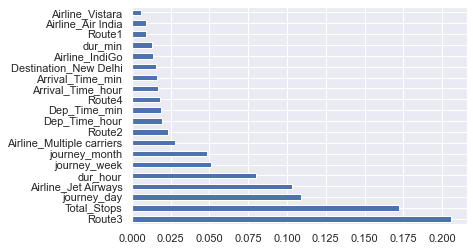

In [97]:
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
X.dtypes

Total_Stops                                   int64
Route1                                        int32
Route2                                        int32
Route3                                        int32
Route4                                        int32
Route5                                        int32
Airline_Air India                             uint8
Airline_GoAir                                 uint8
Airline_IndiGo                                uint8
Airline_Jet Airways                           uint8
Airline_Jet Airways Business                  uint8
Airline_Multiple carriers                     uint8
Airline_Multiple carriers Premium economy     uint8
Airline_SpiceJet                              uint8
Airline_Trujet                                uint8
Airline_Vistara                               uint8
Airline_Vistara Premium economy               uint8
Source_Chennai                                uint8
Source_Delhi                                  uint8
Source_Kolka

In [100]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
print(vif_data)

                                      feature
0                                 Total_Stops
1                                      Route1
2                                      Route2
3                                      Route3
4                                      Route4
5                                      Route5
6                           Airline_Air India
7                               Airline_GoAir
8                              Airline_IndiGo
9                         Airline_Jet Airways
10               Airline_Jet Airways Business
11                  Airline_Multiple carriers
12  Airline_Multiple carriers Premium economy
13                           Airline_SpiceJet
14                             Airline_Trujet
15                            Airline_Vistara
16            Airline_Vistara Premium economy
17                             Source_Chennai
18                               Source_Delhi
19                             Source_Kolkata
20                              So

# Model

In [101]:
#spliting the dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [102]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def model_training(ml_model):
    print('model is: {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("prediction are : {}".format(predictions))
    print("\n")
    r2score = r2_score(y_test,predictions)
    print("r2 score is :{}".format(r2score))
    print("MAE :{}".format(mean_absolute_error(y_test,predictions)))
    print("MSE : {}".format(mean_squared_error(y_test,predictions)))
    print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test,predictions))))
    sns.displot(y_test-predictions)
    

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

model is: RandomForestRegressor()
Training score: 0.9530836813631867
prediction are : [ 8657.48       16932.65333333 13889.04583333 ...  3844.96
  5554.25       10681.63166667]


r2 score is :0.8352148327568983
MAE :1076.831079553473
MSE : 2952612.95234431
RMSE : 1718.3168952042315


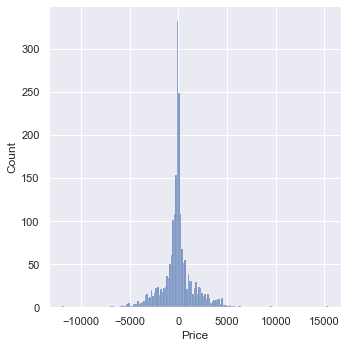

In [104]:
model_training(RandomForestRegressor())

model is: LogisticRegression()


C:\Users\Imran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.3389116442363955
prediction are : [ 9899. 17024. 10844. ...  4226.  6147. 10262.]


r2 score is :0.4069170637703643
MAE :1958.971455311184
MSE : 10626832.43051006
RMSE : 3259.8822724923766


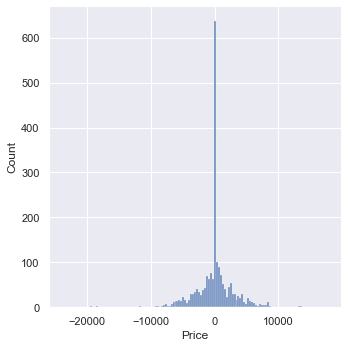

In [105]:
model_training(LogisticRegression())

model is: KNeighborsRegressor()
Training score: 0.7403031080668308
prediction are : [ 9899.  12277.6 12767.2 ...  4926.  10775.8 11076.4]


r2 score is :0.5862929832623167
MAE :1870.1503977538605
MSE : 7412783.05888629
RMSE : 2722.6426608878164


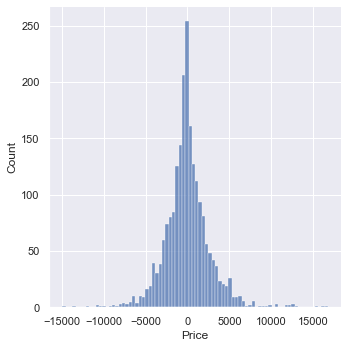

In [109]:
model_training(KNeighborsRegressor())

model is: DecisionTreeRegressor()
Training score: 0.9667772510524137
prediction are : [ 8996. 17024. 14571. ...  3943.  5054. 10262.]


r2 score is :0.7393350408275761
MAE :1216.3159413508035
MSE : 4670582.598853533
RMSE : 2161.153071592462


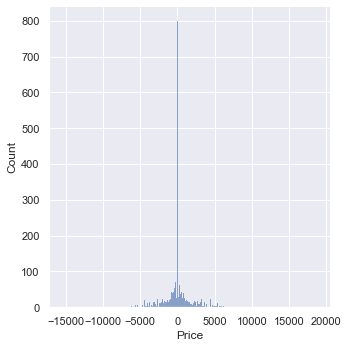

In [110]:
model_training(DecisionTreeRegressor())

model is: SVR()
Training score: 0.03820790428393095
prediction are : [8529.14345924 8266.78250883 8476.75904897 ... 8303.29077728 8471.77495273
 8465.8722336 ]


r2 score is :0.051467479891272205
MAE :3320.101699962947
MSE : 16995761.520581048
RMSE : 4122.5916024487615


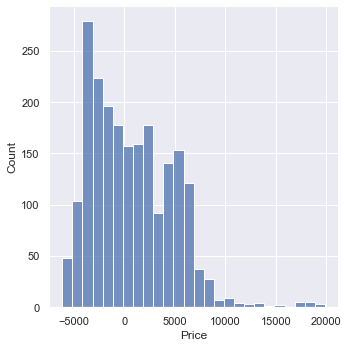

In [111]:
model_training(SVR())

model is: GradientBoostingRegressor()
Training score: 0.8010565055608724
prediction are : [ 5766.97724644 18253.56260968 11995.02601694 ...  4610.21863539
  6609.61098677 11384.03270347]


r2 score is :0.8027985795039743
MAE :1394.852201348151
MSE : 3533445.868451715
RMSE : 1879.7462244813034


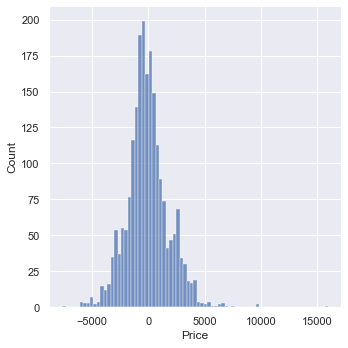

In [112]:
model_training(GradientBoostingRegressor())

In [113]:
# Hyperparameter